### make_blobs

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 10000,centers = 6, random_state = 42)

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression().fit(xtrain, ytrain)
classifier

In [ ]:
print('accuracy|test-score:', classifier.score(xtest,ytest))
print('accuracy|train-score:', classifer.score(xtrain,ytrain))


In [ ]:
import pandas as pd

predictions = classifier.predict(xtest)

pd.DataFrame({'predictions':predictions,'actual':ytest}).head(10)

### voice

In [1]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
csv = pd.read_csv("Resources/voice.csv")
csv.head(1)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.0,0.0,male


In [14]:
X = csv.drop('label', axis = 1)
y = csv['label']

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42)

In [17]:
classifier = LogisticRegression().fit(xtrain,ytrain)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
print('training accuracy',classifier.score(xtrain,ytrain))
print('testing accuracy',classifier.score(xtest,ytest))

training accuracy 0.9065656565656566
testing accuracy 0.9128787878787878


In [23]:
pd.DataFrame({'predictions':classifier.predict(xtest),'actual':ytest}).head(5)

,predictions,actual
2148,female,female
1124,male,male
170,male,male
3158,female,female
2229,female,female


### Decision Tree

In [3]:
from sklearn import tree
from sklearn.datasets import load_iris

iris=load_iris()

classifier = tree.DecisionTreeClassifier().fit(iris.data,iris.target)

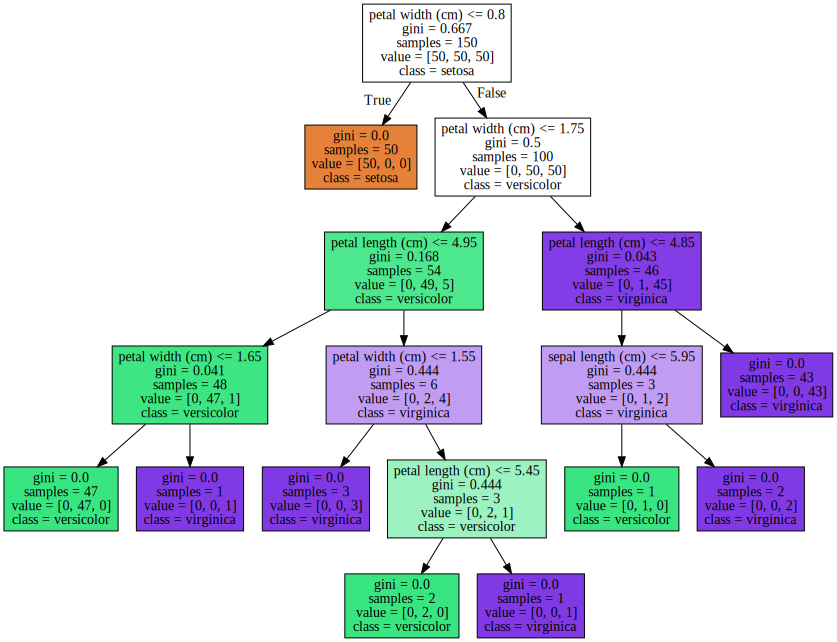

In [8]:
import graphviz

feature_names=iris.feature_names
class_names=iris.target_names

graph = tree.export_graphviz(classifier,out_file=None,filled=True,
                             feature_names=feature_names,
                             class_names=class_names)

graphviz.Source(graph)

### Random Forest

In [38]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
classifier = RandomForestClassifier(n_estimators=500).fit(iris.data,iris.target)

In [39]:
import pandas as pd

print(classifier.feature_importances_,iris.feature_names)

[0.09807138 0.02286684 0.42178076 0.45728102] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [40]:
sorted(zip(classifier.feature_importances_,iris.feature_names),reverse=True)

[(0.4572810163509734, 'petal width (cm)'),
 (0.42178076364907663, 'petal length (cm)'),
 (0.09807138389311933, 'sepal length (cm)'),
 (0.02286683610683039, 'sepal width (cm)')]

### Diabetes - Student

compare decisiontree and randomforest

In [41]:
import pandas as pd

file = pd.read_csv('resources/diabetes.csv')
file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
X=file.drop('Outcome',axis=1)
y=file['Outcome']

In [43]:
feature_names = X.columns
target_names = ['Positive', 'Negative']

In [44]:
from sklearn import tree
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42)

In [45]:
classifier=tree.DecisionTreeClassifier().fit(xtrain,ytrain)

In [46]:
classifier.score(xtest,ytest)

0.703125

In [47]:
import graphviz
import pydotplus

graph = tree.export_graphviz(classifier,
                             out_file=None,
                             filled=True,
                             feature_names=feature_names,
                             class_names=target_names,
                             special_characters=True
                            )

graphviz.Source(graph)

pydotplus.graph_from_dot_data(graph).write_png('decision.png')

TypeError: can only concatenate str (not "numpy.int64") to str

In [65]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=500).fit(xtrain,ytrain)

classifier.score(xtest,ytest)

0.7447916666666666

In [67]:
sorted(zip(classifier.feature_importances_,feature_names),reverse=True)

[(0.2623225201274277, 'Glucose'),
 (0.16064365292343707, 'BMI'),
 (0.14539040543038884, 'Age'),
 (0.1169522609272051, 'DiabetesPedigreeFunction'),
 (0.08769874930709608, 'BloodPressure'),
 (0.081722122606937, 'Pregnancies'),
 (0.0731918966146833, 'Insulin'),
 (0.07207839206282553, 'SkinThickness')]

## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

data=iris.data
target=iris.target

xtrain,xtest,ytrain,ytest=train_test_split(data,target,random_state=42,stratify=target)


In [15]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler().fit(xtrain.reshape(-1,1))

xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)



 K:1 1.0|0.947
 K:3 0.955|0.974
 K:5 0.973|0.974
 K:7 0.973|0.947
 K:9 0.973|0.974
 K:11 0.973|0.974
 K:13 0.982|0.947
 K:15 0.982|0.947
 K:17 0.982|0.947
 K:19 0.982|0.947


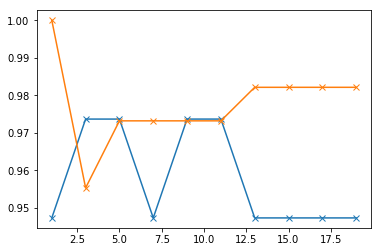

In [17]:
test_list = []
train_list = []

for K in range(1,20,2):
    
    classifier = KNeighborsClassifier(n_neighbors=K).fit(xtrain_scaled,ytrain)
    
    train_score = classifier.score(xtrain_scaled,ytrain)
    test_score = classifier.score(xtest_scaled,ytest)

    
    print(f' K:{K} {train_score:.3}|{test_score:.3}')
    
    train_list.append(train_score)
    test_list.append(test_score)
    
    
    
plt.plot(range(1,20,2),test_list,marker='x')  
plt.plot(range(1,20,2),train_list,marker='x')
    

## SVM

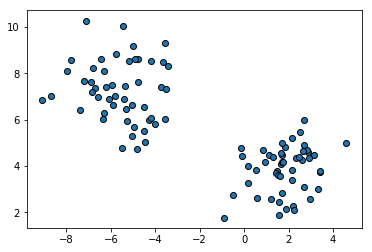

In [4]:
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs

data,target = make_blobs(n_samples=100,cluster_std=1.25,centers=2)

plt.scatter(data[:,0],data[:,1],edgecolor='k')

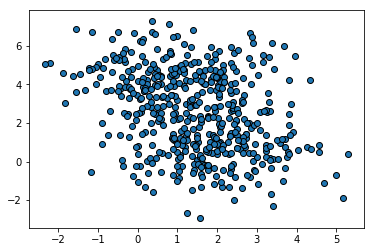

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

data,target = make_blobs(n_samples=500,cluster_std=1.25,centers=2,random_state=0)

plt.scatter(data[:,0],data[:,1],edgecolor='k')

In [22]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

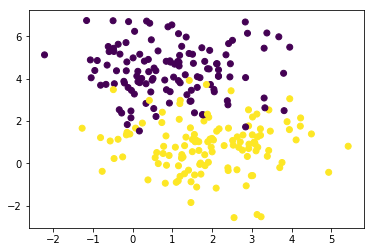

In [24]:
data,target = make_blobs(centers=2,n_samples=250,cluster_std=1.25,random_state=0)
plt.scatter(data[:,0],data[:,1],c=target)

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(data,target,stratify=target,random_state=0)

In [31]:
svc_model = SVC(kernel='linear').fit(xtrain,ytrain)
svc_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
import numpy as np

In [38]:
from sklearn.metrics import classification_report
predictions = svc_model.predict(xtest)
print(classification_report(ytest, predictions,target_names=['dark','light']))

              precision    recall  f1-score   support

        dark       0.93      0.84      0.89        32
       light       0.85      0.94      0.89        31

   micro avg       0.89      0.89      0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



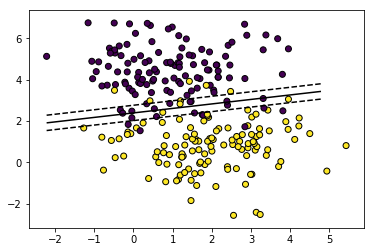

In [76]:
x_min = data[:, 0].min()
x_max = data[:, 0].max()
y_min = data[:, 1].min()
y_max = data[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]

Z = svc_model.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)


plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='k')
plt.show()

In [113]:
from sklearn.metrics import classification_report
predictions = svc_model.predict(xtest)

clf_report = classification_report(ytest,predictions)
print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.85      0.94      0.89        31

   micro avg       0.89      0.89      0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



In [120]:
from sklearn.datasets.samples_generator import make_blobs

xvalues,yvalues=make_blobs(centers=2,cluster_std=0.95, edge_color='y')

TypeError: make_blobs() got an unexpected keyword argument 'edge_color'